Mounting Google Drive



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copying Dataset from Google Drive to Colab

In [3]:
!pwd

/content


In [4]:
!cp /content/drive/MyDrive/vehicle_detection_dataset.zip /content

Unzipping the Dataset

In [5]:
!unzip /content/vehicle_detection_dataset.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/vehicle_detection_dataset/train/labels/img040_JPG_jpg.rf.673fa0a51f15ed10ea6f030f339bfcd0.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img040_JPG_jpg.rf.847c5a59af9c4c71d32b5bfd5f6ea078.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img041_JPG_jpg.rf.21dcaf732b07cf7c3cca3547d52b652a.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img041_JPG_jpg.rf.dcb90d45e73d986f39b2ef25a5114e25.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img042_JPG_jpg.rf.15827f509dd5753686e2320e8f12560e.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img043_JPG_jpg.rf.24c6f116b267ba2e478bed477743fa2c.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img043_JPG_jpg.rf.8236fd43482213ba1643854330adc14a.txt  
  inflating: /content/vehicle_detection_dataset/train/labels/img044_JPG_jpg.rf.269ddbcdf1962bce5e7ec092e724c9b3.txt  
  inf

#Exploring the Dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

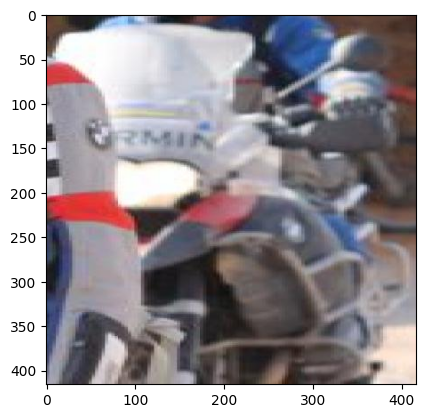

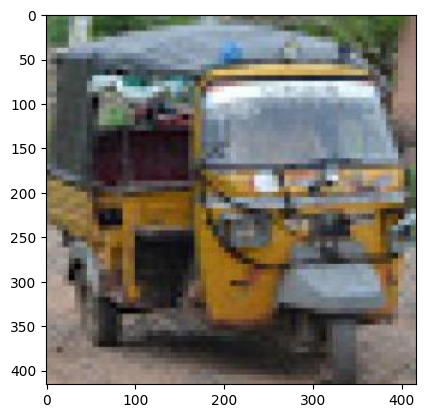

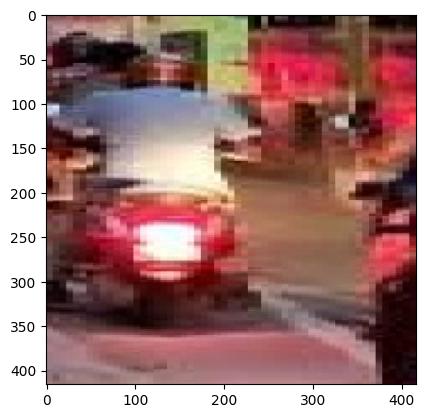

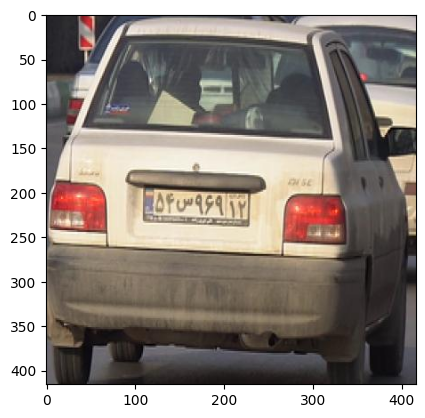

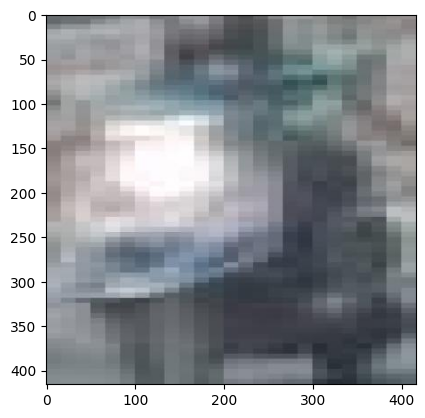

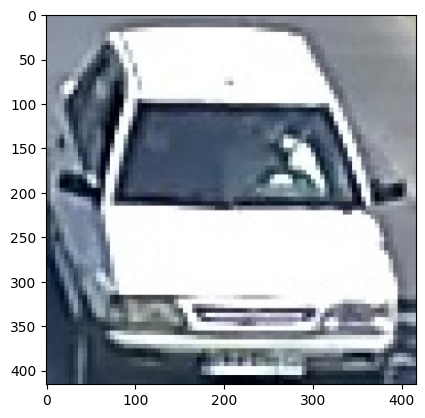

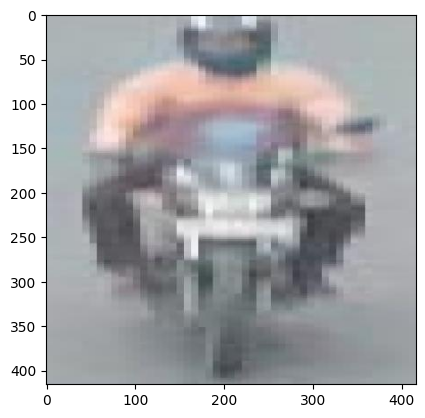

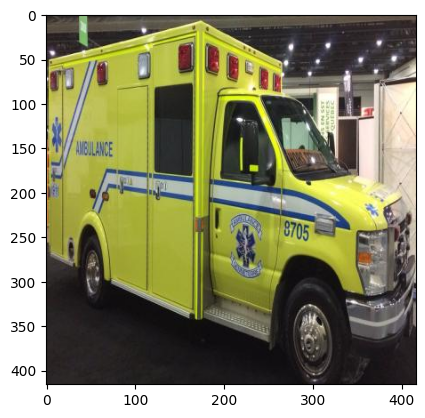

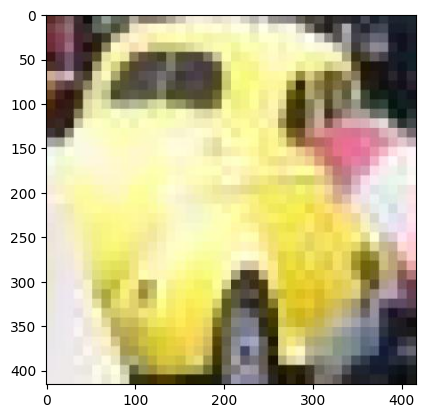

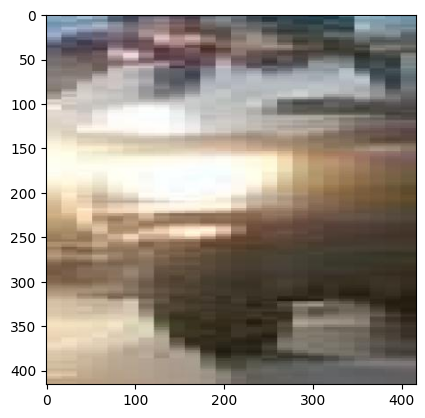

In [7]:
for img in os.listdir('/content/vehicle_detection_dataset/train/images')[:10]:
  path = f'/content/vehicle_detection_dataset/train/images/{img}'
  img_read = plt.imread(path)
  plt.imshow(img_read)
  plt.show()

Drawing the Bounding Box

In [8]:
#read the txt file(read single file only)
def parse_yolo_annotation(annotation_path):
  with open(annotation_path, 'r') as file:
    lines = file.read().split('\n')
    annotations = []
    for line in lines:
      if line.strip() != "":
        data = line.split()
        class_id = int(data[0])
        x,y,w,h = map(float, data[1:])
        var_dict = {'class_id' : class_id, 'x' : x, 'y' : y, 'w' : w, 'h' : h}
        annotations.append(var_dict)
  return annotations


{'class_id': 5, 'x': 0.5072115384615384, 'y': 0.5, 'w': 0.984375, 'h': 1.0}


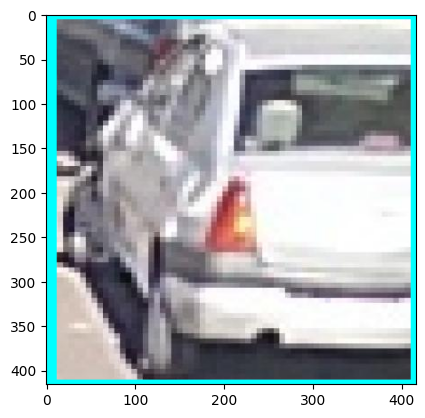

{'class_id': 5, 'x': 0.5, 'y': 0.5, 'w': 1.0, 'h': 1.0}


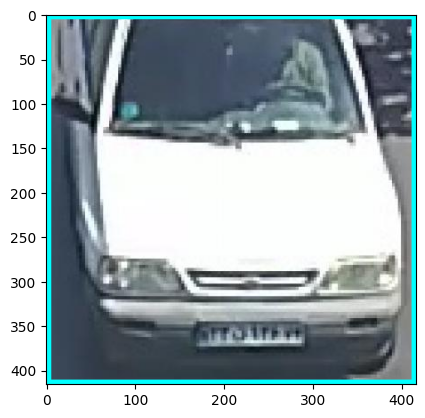

{'class_id': 5, 'x': 0.5180288461538461, 'y': 0.5, 'w': 0.9627403846153846, 'h': 1.0}


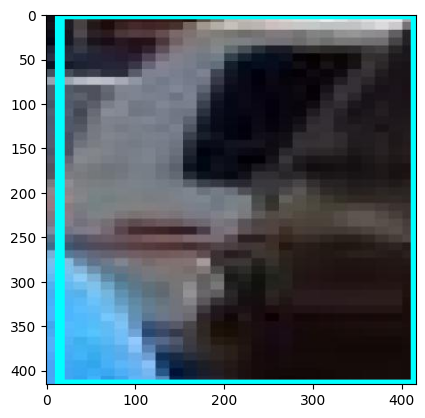

{'class_id': 5, 'x': 0.5, 'y': 0.5, 'w': 1.0, 'h': 1.0}


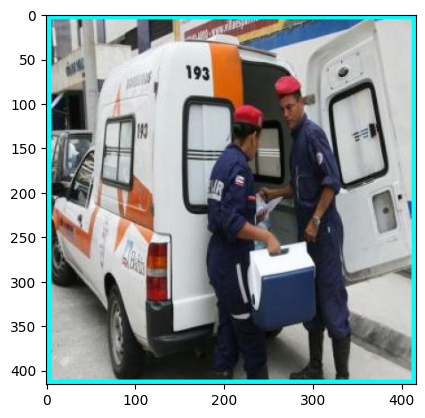

{'class_id': 3, 'x': 0.5, 'y': 0.5, 'w': 1.0, 'h': 1.0}


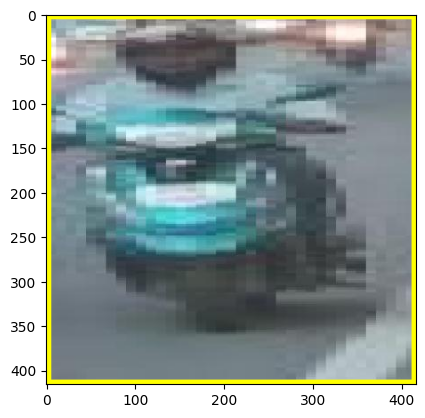

{'class_id': 5, 'x': 0.5072115384615384, 'y': 0.5060096153846154, 'w': 0.9855769230769231, 'h': 0.9831730769230769}


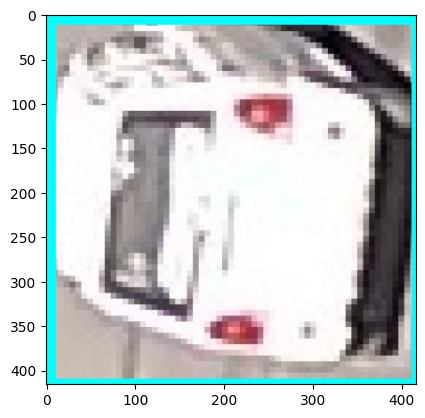

{'class_id': 3, 'x': 0.5120192307692307, 'y': 0.5, 'w': 0.9759615384615384, 'h': 1.0}


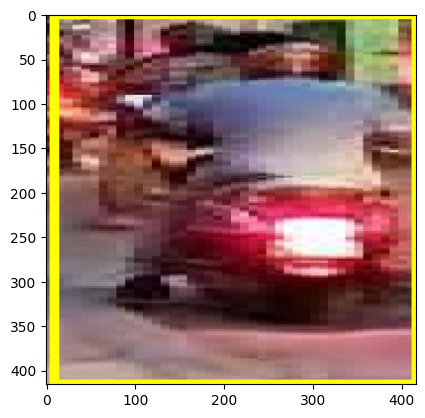

{'class_id': 5, 'x': 0.5, 'y': 0.5024038461538461, 'w': 1.0, 'h': 0.9951923076923077}


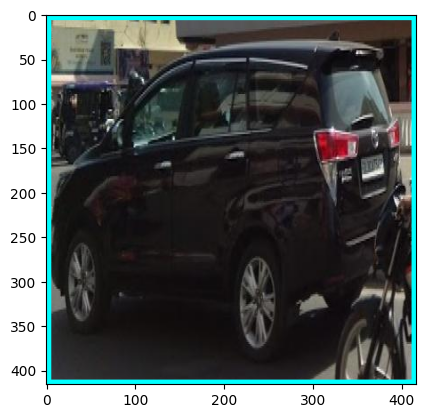

{'class_id': 5, 'x': 0.5, 'y': 0.5, 'w': 1.0, 'h': 1.0}


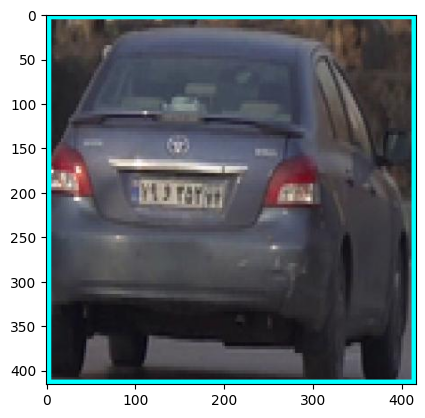

{'class_id': 3, 'x': 0.5120192307692307, 'y': 0.5, 'w': 0.9759615384615384, 'h': 1.0}


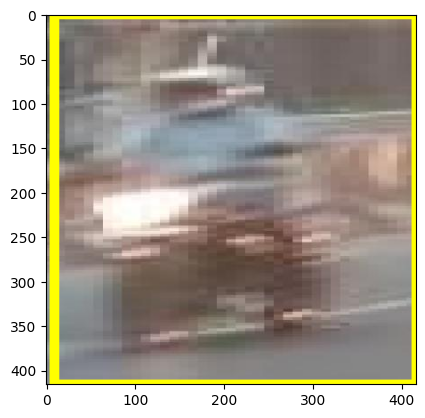

In [9]:
data_dir = '/content/vehicle_detection_dataset/valid'
image_files = [f for f in os.listdir(f'{data_dir}/images')[:10] if f.endswith('.jpg')]
for image_file in image_files:
  img_path = f'/content/vehicle_detection_dataset/valid/images/{image_file}'
  image = plt.imread(img_path)
  #changing the path to txt
  annotation_path = f'/content/vehicle_detection_dataset/valid/labels/{image_file[:-4]}.txt'
  annotations = parse_yolo_annotation(annotation_path)

  class_color_dict = {
    0: (255, 0, 0),      # Ambulance - Red
    1: (0, 255, 0),      # Auto - Green
    2: (0, 0, 255),      # Bicycle - Blue
    3: (255, 255, 0),    # Bike - Yellow
    4: (255, 165, 0),    # Bus - Orange
    5: (0, 255, 255),    # Car - Cyan
    6: (128, 0, 128),    # Motorcycle - Purple
    7: (128, 128, 128),  # Truck - Gray
    8: (255, 255, 255),  # auto-rickshaw - White
    9: (0, 128, 0),      # bus - Dark Green
    10: (0, 0, 128),     # car - Dark Blue
    11: (128, 0, 0),     # lorry - Dark Red
    12: (128, 128, 0),   # mini truck - Olive
    13: (255, 0, 255),   # small-motorcycle - Magenta
    14: (128, 64, 0)     # smalltruck - Brown
    }

  for annotation in annotations:
    print(annotation)
    class_id = annotation['class_id']
    x = annotation['x']
    y = annotation['y']
    w = annotation['w']
    h = annotation['h']

    color = class_color_dict.get(class_id, (0,0,0))
    img_h,img_w,channel = image.shape
    x1 = int((x - w/2) * img_w)
    y1 = int((y - h/2) * img_h)

    x2 = int((x + w/2) * img_w)
    y2 = int((y + h/2) * img_h)

    cv2.rectangle(image,(x1, y1),(x2, y2), color, 10)

  plt.imshow(image)
  plt.show()

#*Training the model(“vehicle_data.yaml” file can also be used by configuring the path)*

In [10]:
import yaml

In [11]:
data_yaml = dict(
    train = '/content/vehicle_detection_dataset/train',
    val = '/content/vehicle_detection_dataset/valid',
    nc = 15,
    names = ['Ambulance', 'Auto', 'Bicycle', 'Bike', 'Bus', 'Car', 'Motorcycle', 'Truck', 'auto-rickshaw', 'bus', 'car', 'lorry', 'mini truck', 'motorcycle', 'truck']
)


with open('vehicle_name.yaml','w') as file:
  yaml.dump(data_yaml, file)

Installing Ultralytics

In [12]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 4.5 MB/s eta 0:00:00


In [13]:
!yolo detect train data=/content/vehicle_name.yaml model=yolov8s.pt epochs=10 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 103MB/s]
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/vehicle_name.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

In [ ]:
#Training using Yolov8s
!yolo detect train data=/content/vehicle_name.yaml model=yolov8s.pt epochs=10 imgsz=640

In [34]:
#Training using Yolov8m
!yolo detect train data=/content/vehicle_name.yaml model=yolov8m.pt epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 259MB/s]
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/vehicle_name.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tr

#Inference the Yolov8

In [14]:
#Inference on Validation Dataset with Fine-Tuned(Yolov8s)
!yolo predict model = /content/runs/detect/train/weights/best.pt imgsz=640 conf=0.25 source = /content/vehicle_detection_dataset/valid/images

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs

image 1/1233 /content/vehicle_detection_dataset/valid/images/100car_jpg.rf.5f0e5a412e76945aaf744840da4f9604.jpg: 640x640 1 Car, 22.9ms
image 2/1233 /content/vehicle_detection_dataset/valid/images/101Ambulance_jpg.rf.f97b5ceed62bb2637e2591f420871cda.jpg: 640x640 1 Ambulance, 44.7ms
image 3/1233 /content/vehicle_detection_dataset/valid/images/101car_jpg.rf.b98471406bb48d33367b24addda19f84.jpg: 640x640 1 Car, 31.6ms
image 4/1233 /content/vehicle_detection_dataset/valid/images/102car_jpg.rf.ebd8e894ae46af2447b26401c473358e.jpg: 640x640 1 Car, 55.1ms
image 5/1233 /content/vehicle_detection_dataset/valid/images/103_jpg.rf.34efd4fd23c28338f024d6247430c2c4.jpg: 640x640 1 Car, 23.4ms
image 6/1233 /content/vehicle_detection_dataset/valid/images/103_jpg.rf.dcb8fe4ac8a6c5ef926c37a5dc1dff3d.jpg: 640x640 1 Car, 36.2ms
image 7/1233 /

In [15]:
#Copying the Model to Drive
!cp -r runs /content/drive/MyDrive/Detect_Vehicle_Yolov8

In [35]:
#Inference on video with Fine-Tuned(Yolov8s)
!yolo predict model = /content/VehicleDetectionYolov8/runs/detect/train2/weights/best.pt conf=0.25 source = /content/traffic_video.mp4

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/4509) /content/traffic_video.mp4: 384x640 1 Car, 245.5ms
video 1/1 (2/4509) /content/traffic_video.mp4: 384x640 1 Car, 35.8ms
video 1/1 (3/4509) /content/traffic_video.mp4: 384x640 1 Car, 44.5ms
video 1/1 (4/4509) /content/traffic_video.mp4: 384x640 1 Car, 32.3ms
video 1/1 (5/4509) /content/traffic_video.mp4: 384x640 1 Car, 44.4ms
video 1/1 (6/4509) /content/traffic_video.mp4: 384x640 1 Car, 59.8ms
video 1/1 (7/4509) /content/traffic_video.mp4: 384x640 1 Car, 45.5ms
video 1/1 (8/4509) /content/traffic_video.mp4: 384x640 1 Car, 47.0ms
video 1/1 (9/4509) /content/traffic_video.mp4: 384x640 1 Car, 33.1ms
video 1/1 (10/4509) /content/traffic_video.mp4: 384x640 1 Car, 44.9ms
video 1/1 (11/4509) /content/traffic_video.mp4: 384x640 1 Car, 34.4ms
video 1/1 (12/4509) /content/traffic_video.mp4: 384x640 1 Car, 45.2m

In [31]:
#Inference on video with Pre-Trained(Yolov8s)
!yolo predict model = /content/yolov8s.pt conf=0.25 source = /content/traffic_video.mp4

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

video 1/1 (1/4509) /content/traffic_video.mp4: 384x640 4 cars, 1 airplane, 3 trucks, 113.9ms
video 1/1 (2/4509) /content/traffic_video.mp4: 384x640 5 cars, 1 airplane, 2 trucks, 11.5ms
video 1/1 (3/4509) /content/traffic_video.mp4: 384x640 4 cars, 1 airplane, 1 truck, 11.6ms
video 1/1 (4/4509) /content/traffic_video.mp4: 384x640 4 cars, 2 airplanes, 2 trucks, 13.6ms
video 1/1 (5/4509) /content/traffic_video.mp4: 384x640 4 cars, 2 airplanes, 2 trucks, 21.3ms
video 1/1 (6/4509) /content/traffic_video.mp4: 384x640 4 cars, 2 airplanes, 2 trucks, 11.6ms
video 1/1 (7/4509) /content/traffic_video.mp4: 384x640 6 cars, 1 truck, 17.0ms
video 1/1 (8/4509) /content/traffic_video.mp4: 384x640 6 cars, 2 trucks, 14.4ms
video 1/1 (9/4509) /content/traffic_video.mp4: 384x640 4 cars, 2 trucks, 16.2ms
video 1/1 (10/4509) /content/traff

In [38]:
#Inference on video with Yolov8m
!cp -r /content/VehicleDetectionYolov8/runs/detect/predict6/traffic_video.avi runs /content/drive/MyDrive/week_4

^C
